In [1]:
import numpy as np
import scipy as sc
from scipy.integrate import solve_ivp as sivp
import matplotlib.pyplot as plt

In [2]:
def ω(a):
    return -0.45-1.79*(1-a)

def dρλ(a, ρλ):
    return -3*(ω(a)+1)*ρλ/a

def ρm(a):
    return ρc*Ωm0/a**3

def ργ(a):
    return ρc*Ωγ0/a**4

In [3]:
H0 = 67.4*(3.086*10**(19))**(-1)*3.17*10**8*10**6 #/Myr
ρc = 8.5*10**(-27) #kg/m^3

ai = 1e-5
a0 = 1

ti = 1e-19 # Myr
t0 = 13.7e3 # Myr

ρλ0 = [5.78*10**(-27)] #kg/m^3
ρλi = [1.11e-40] #kg/m^3
Ωm0 = 0.32
Ωγ0 = 9.23*10**(-5)
N = 1e6

In [4]:
sclfctrs1 = np.linspace(ai, a0, int(N))
z = (1/sclfctrs1)-1
solver1 = sivp(dρλ, t_span = [ai, a0], y0 = ρλi, t_eval = sclfctrs1)
print(abs(ρλ0-solver1.y[0][-1]))

[3.64814868e-30]


In [5]:
print("a~", solver1.t)
print("ρΛ~", solver1.y[0])

a~ [1.0000000e-05 1.0999991e-05 1.1999982e-05 ... 9.9999800e-01 9.9999900e-01
 1.0000000e+00]
ρΛ~ [1.11000000e-40 1.58234147e-40 2.17880587e-40 ... 5.77637091e-27
 5.77636138e-27 5.77635185e-27]


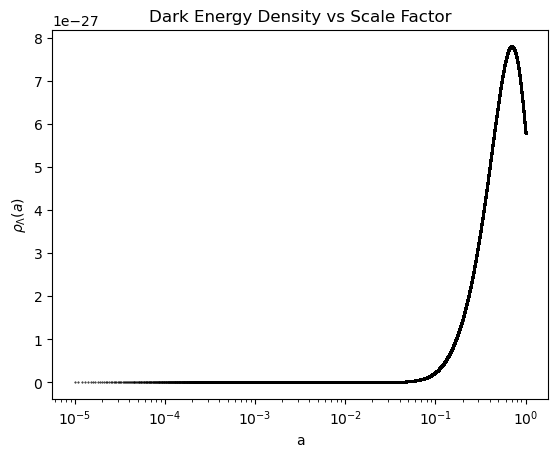

In [6]:
plt.scatter(solver1.t, solver1.y[0], s=0.2, color='black')
plt.xlabel("a")
plt.ylabel("$\\rho_\Lambda(a)$")
plt.xscale('log')
plt.title("Dark Energy Density vs Scale Factor")
# plt.savefig("dark_energy_vs_scale_factor.png")
plt.show()

/tmp/ipykernel_59018/2079642351.py:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(-0.5, 1e5)


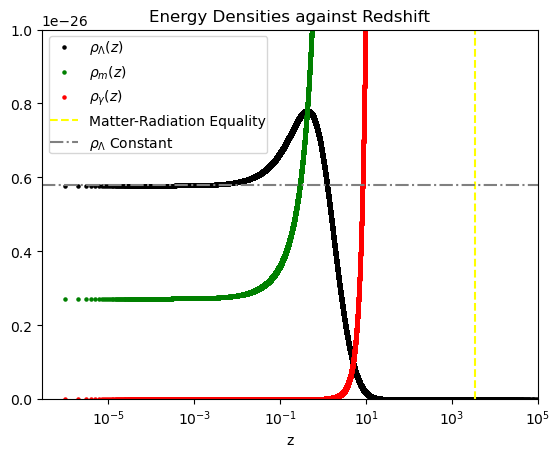

In [7]:
plt.scatter(z, solver1.y[0], s=5, c='black', label="$\\rho_\Lambda(z)$")
plt.scatter(z, ρm(sclfctrs1), s=5, c='green', label="$\\rho_m(z)$")
plt.scatter(z, ργ(sclfctrs1), s=5, c='red', label="$\\rho_\gamma(z)$")
plt.axvline(x=3400, color='yellow', linestyle = '--', label="Matter-Radiation Equality")
plt.axhline(y=ρλ0[0], color='grey', linestyle = '-.', label="$\\rho_\Lambda$ Constant")
plt.xscale('log')
plt.xlabel("z")
plt.ylim(0, 1e-26)
plt.xlim(-0.5, 1e5)
plt.title("Energy Densities against Redshift")
plt.legend(loc='upper left', borderpad=0.1)
# plt.savefig("densities_vs_redshift.png")
plt.show()

In [8]:
def da(t, a, ρλ):
    return a*H0*np.sqrt((Ωm0/a**3)+(Ωγ0/a**4)+(ρλ/ρc))

def dρλ(t, a, ρλ):
    return -3*H0*(ω(a)+1)*ρλ*np.sqrt((Ωm0/a**3)+(Ωγ0/a**4)+(ρλ/ρc))

def cpld_aρλ(t, yi):
    ai, ρλi = yi
    dadt = da(t, ai, ρλi)
    dρλdt = dρλ(t, ai, ρλi)
    return [dadt, dρλdt]

In [9]:
times = np.linspace(ti, t0, int(N))
solver2 = sivp(cpld_aρλ, t_span = [ti, t0], y0 = [ai, ρλi[0]], t_eval = times)
solver3 = sivp(da, t_span = [ti, t0], y0 = [ai], t_eval = times, args = (ρλi[0],))

/tmp/ipykernel_59018/3859665353.py:2: RuntimeWarning: invalid value encountered in sqrt
  return a*H0*np.sqrt((Ωm0/a**3)+(Ωγ0/a**4)+(ρλ/ρc))
/tmp/ipykernel_59018/3859665353.py:5: RuntimeWarning: invalid value encountered in sqrt
  return -3*H0*(ω(a)+1)*ρλ*np.sqrt((Ωm0/a**3)+(Ωγ0/a**4)+(ρλ/ρc))


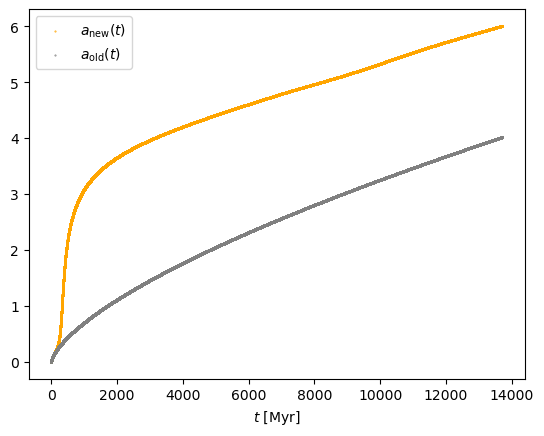

In [10]:
plt.scatter(solver2.t, solver2.y[0], label="$a_{\mathrm{new}}(t)$", c='orange', s=0.2)
plt.scatter(solver3.t, solver3.y[0], label="$a_{\mathrm{old}}(t)$", c='grey', s=0.2)
plt.xlabel("$t$ [Myr]")
plt.legend()
plt.savefig("difference_in_scalefac_behaviour")
plt.show()